In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load Data
df = pd.read_csv("titanic1.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
1,2,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
2,3,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
3,4,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
4,5,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  40 non-null     int64  
 1   Survived     40 non-null     int64  
 2   Pclass       40 non-null     int64  
 3   Name         40 non-null     object 
 4   Sex          40 non-null     object 
 5   Age          30 non-null     float64
 6   SibSp        40 non-null     int64  
 7   Parch        40 non-null     int64  
 8   Ticket       40 non-null     object 
 9   Fare         40 non-null     float64
 10  Cabin        7 non-null      object 
 11  Embarked     39 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.9+ KB


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            10
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          33
Embarked        1
dtype: int64

In [6]:
# Fill 'Age' missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_11496\529560969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_11496\529560969.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:
# Drop 'Cabin' column because too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Example: If PassengerId should be int
df['PassengerId'] = df['PassengerId'].astype(int)

In [10]:
# Standardize 'Sex' values
df['Sex'] = df['Sex'].str.strip().str.lower()

In [11]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Data cleaned & saved as titanic_cleaned.csv")

Data cleaned & saved as titanic_cleaned.csv


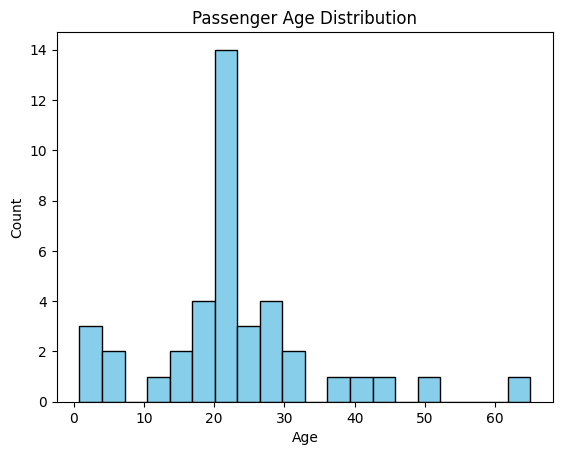

In [12]:
# Histogram of Age
plt.hist(df["Age"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_11496\3996841697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=df, palette="pastel")


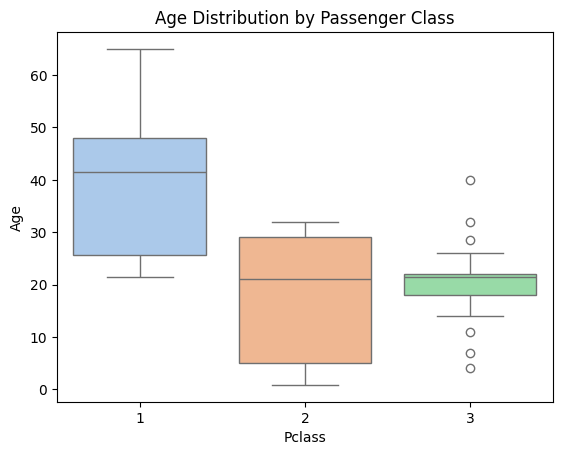

In [13]:
# Boxplot for Age by Pclass
sns.boxplot(x="Pclass", y="Age", data=df, palette="pastel")
plt.title("Age Distribution by Passenger Class")
plt.show()

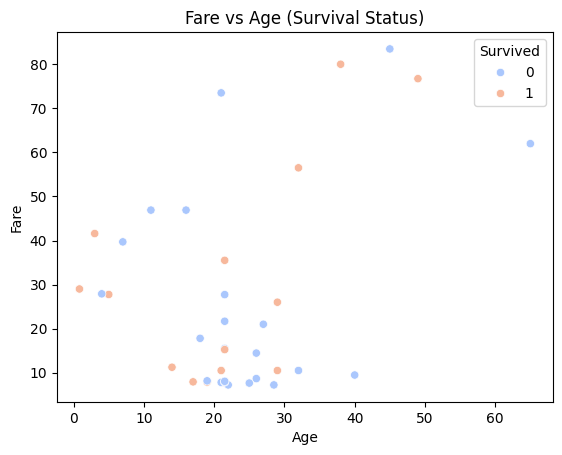

In [14]:
# Scatterplot Fare vs Age, color by Survived
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="coolwarm")
plt.title("Fare vs Age (Survival Status)")
plt.show()

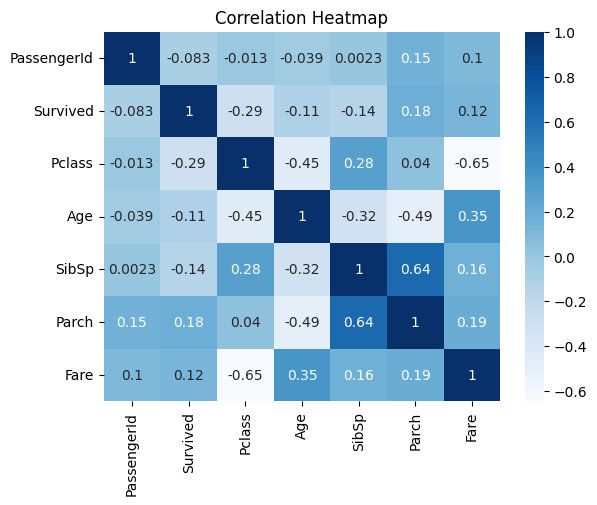

In [22]:
# Heatmap of numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()